> **Student Names and IDs**:
>
> - Divya Chowbey, 0710368
> - Feroze Mohideen, 0707410
> - Caroline Wang, 0707659

# Homework 2

## Part 1: Intuition in Many Dimensions

### Problem 1.1

What is the volume $c(d, a)$ of $C(d, a)$ and, in particular, what is $c(d, 1)$? No need to prove your answers.

> The volume of $c(d, a)$ is $a^d$ and $c(d, 1)$ is 1.

### Problem 1.2

Give a simple formula for the volume $e(d, \epsilon)$ of $E(d, \epsilon)$ in terms of $d$ and $\epsilon$.

> $e(d, \epsilon) = 1 - (1 - \epsilon)^d$

### Problem 1.3

Use the function `matplotlib.pyplot.loglog` to plot $e(d, 10^{-3})$ for $d$ between $1$ and $10^{6}$, and with logarithmic scaling on both axes. Label the axes. 

Text(0,0.5,'Volume e(d, $\\epsilon = 10^{-3}$)')

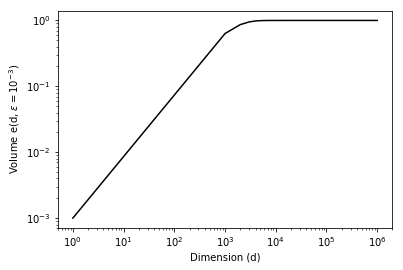

In [58]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(1, 10**6, 1000)

def vol(x):
    return 1 - (1-10**-3)**x

y = vol(x)
plt.loglog(x, y, 'k-')
plt.xlabel('Dimension (d)')
plt.ylabel('Volume e(d, $\epsilon = 10^{-3}$)')

### Problem 1.4

Write a simple sentence that describes where most of the points in the unit cube are when the number $d$ of dimensions is large and $\epsilon$ is small. What is the approximate numerical value of the fraction of points in the $\epsilon$-skin of the unit cube when $d=2$ and $\epsilon=10^{-3}$?

> Most of the points are in the $\epsilon$-skin when the dimension is large and $\epsilon$ is small. The approximate fraction of points in the skin when $d=2$ and $\epsilon=10^{-3}$ is:
$$\frac{e(2, 10^{-3})}{1} = 0.001999$$.

### Problem 1.5

Write a formula for the ratio $r(d)$ between the volume of the unit sphere and that of the 2-cube. Simplify your formula if possible and show your calculations.

> $$r(d) = S(d) / C(d, 2) = \frac{2\pi^{d/2}}{d\Gamma(d/2)} / 2^d = $$

> $$ \frac{\pi^{d/2}}{d2^{d-1}\Gamma(d/2)} $$

 

### Problem 1.6

Plot $r(d)$ (as a regular plot, no logarithms) for every integer $d$ between 1 and 10. Since only integer values of $d$ make sense, draw dots connected by a solid line (that is, specify options `marker='.', markersize=12` for `matplotlib.pyplot.plot`).

Text(0,0.5,'r(d)')

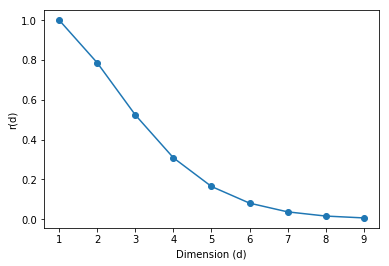

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp
import math

%matplotlib inline
x = np.arange(1,10)

def r(d):
    return (0.5**(d-1)*(math.pi**(d/2)))/(d*sp.gamma(d/2))

y = r(x)
plt.plot(x, y, marker='.', markersize=12)
plt.xlabel('Dimension (d)')
plt.ylabel('r(d)') 

### Problem 1.7

Approximately what percentage of the volume of a cube is contained in the sphere inscribed the cube when $d=2$? And when $d=10$?

> $$r(2) = \frac{2^{1-2}\pi^{2/2}}{2\Gamma(2/2)} \approx 79\%$$

> $$r(10) = \frac{2^{1-10}\pi^{10/2}}{10\Gamma(10/2)} \approx 0.25\%$$

## Part 2: Loss

### Problem 2.1

The output $y$ to a classifier $h$ is the activity performed by the single person visible in the image $\mathbf{x}$. That person is playing tennis, and the possible activities are _serve_, _forehand_, _backhand_, _volley_, and _other_. The _other_ activity covers any shot that is not of the other types, and any other activity or lack thereof.

> a. If the signature of $h$ is $X\rightarrow Y$, what are $X$ and $Y$, in terms of quantities given in the text for this part?
>
> b. Write the zero-one loss matrix for this classifier.

Label your answers a and b.

To help you with math formatting, here is a small matrix with two rows and two columns:

$$
\left[\begin{array}{cc}
11 & 12 \\
21 & 22
\end{array}\right]
$$

and here is the symbol for set of real numbers: $\mathbb{R}$.

> a.)
> X: the  space of real-valued 480x640 matrices ($\mathbb{R^{307200}}$). Y is the finite set of five elements: {serve, forehand, backhand, volley and other}. Y can be represented by one hot encoding vectors:
$$
\left[\begin{array}{c}1 0 0 0 0\end{array}\right],
\left[\begin{array}{c}0 1 0 0 0\end{array}\right],
\left[\begin{array}{c}0 0 1 0 0\end{array}\right],
\left[\begin{array}{c}0 0 0 1 0\end{array}\right],
\left[\begin{array}{c}0 0 0 0 1\end{array}\right],
$$ 
> where the indices of each vector correspond to the output categories: serve, forehand, backhand, volley and other.  

> b.) Zero One Loss Matrix:
$
\left[\begin{array}{ccccc}
0 & 1 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 & 1 \\
1 & 1 & 0 & 1 & 1 \\
1 & 1 & 1 & 0 & 1 \\
1 & 1 & 1 & 1 & 0 \\
\end{array}\right]
$

### Problem 2.2

> a. Is $h$ a classifier or a regressor?
>
> b. If the signature of $h$ is $X\rightarrow Y$, what are $X$ and $Y$, in terms of quantities given in the text for this part?
>
> c. Why can the loss function not be represented by a matrix for this problem?

> a. $h$ is a regressor.

> b. X: the  space of real-valued 480x640 matrices. Y is a subset of $\mathbb{R^{25}}$.

> c. Since this is a regression problem, not a classification problem, there are an infinite number of possible output vectors $\bf{y}$ (rather than the 5 distinct possible output vectors we had in 2.1). Therefore it is impossible to represent the loss function with a finite dimensional square matrix where each row corresponds to a true value and each column represents a predicted value.

  

### Data

In [60]:
import pickle

with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

### Problem 3.1

Write a function `train` with two arguments. The first argument `T` is a training set represented like `data['T']` above. The second argument `k` is a nonnegative integer. The function `train` fits a univariate polynomial of degree `k` to the data in `T`.

Show your code and the result of fitting a polynomial of degree 3 to `data['T']`. Specifically, show the coefficients of the polynomial in decreasing order of degree and with three decimals after the period, and then use the function `show` below (similar to that in homework 1, but using `numpy.polyval`) to plot both training set and polynomial.

In [61]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def show(x, y, name, hList = []):
    plt.plot(x, y, marker='.', markersize=12, ls='', label=name)
    npt = 100
    xrange = [min(x), max(x)]
    xFine = np.linspace(xrange[0], xrange[1], npt)
    for h in hList:
        hxFine = np.polyval(h, xFine)
        plt.plot(xFine, hxFine, label= 'degree ' + str(len(h)-1))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

coefficients of polynomial (decreasing order): 0.036   -0.336   0.661   0.139   

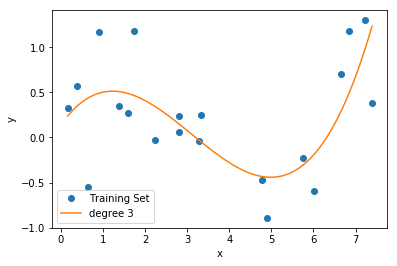

In [62]:
def train(T, k):
    # fits univariate polynomial of degree k to data in T
    p = np.polyfit(T['x'], T['y'], k)
    return p

with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
    # test code: fit polynomial of degree 3 to data['T']
    T = data['T']
    k = 3
    p = train(T, k)
    print("coefficients of polynomial (decreasing order): ", end='')
    for i in range(k+1):
        print("%0.3f" %p.item(i), end= '   ')
    show(T['x'], T['y'], 'Training Set',[p])

### Problem 3.2

Write a function `loss(y, yp)` that takes the true value `y` and the predicted value `yp` for a regression problem and returns the quadratic loss $\ell(y, y') = (y - y')^2$. The arguments are `numpy` arrays of equal size, and the output is an array of the same size with all of the losses.

Then write a function `L(h, T, l)` that takes a `numpy` vector `h` of polynomial coefficients, a training set `T` represented as a dictionary with entries `x` and `y` as shown earlier, and a loss function `l` of the same signature as `loss`, and computes the empirical risk of `h` on `T` with loss `l`:

$$
L_T(h) = \frac{1}{N} \sum_{n=1}^N \ell(y_n, h(x_n))
$$

where $N$ is the number of samples in $T$.

Show your code and the numerical value of the empirical risk for the fit in problem 3.1. Use three decimal digits after the period.

In [63]:
def loss(y, yp):
    losses = (y-yp)**2
    return losses

def L(h, T, l):
    loss_emp = np.mean(l(T['y'], np.polyval(h, T['x']) ) )
    return loss_emp

with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
    T = data['T']
    k = 3
    p = train(T, k)
    loss_emp = L(p, T, loss)
    print("numerical value of the empirical risk for the fit in problem 3.1: %0.3f" %loss_emp)

numerical value of the empirical risk for the fit in problem 3.1: 0.207


### Problem 3.3

Make a figure that superimposes two plots in the same diagram, each plot represented as a sequence of dots conencted by lines (as in the function `show` above).

The first plot is the _training risk_, that is, the empirical risk on `data['T']` for the fit in problem 3.1 but for polynomial degrees $k = 0,\ldots, 12$, using the quadratic loss. The second plot is the _validation risk_, that is, the analogous quantity estimated on `data['V']` (of course, for both plots the polynomials are trained on `data['T']`).

Label the axes of the figure as "k" and "risk" and place a legend that specifies which plot is which.

Show both code and plot.

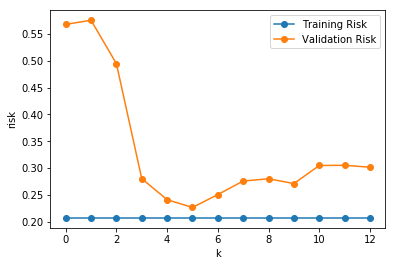

In [64]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
    T = data['T']
    V = data['V']
    training_risk = np.zeros(13)
    validation_risk = np.zeros(13)
    for k in range(13): # 0 to 12
        p = train(T, k)
        loss_emp_training = L(p, T, loss)
        training_risk[k] = loss_emp
        
        loss_emp_validation = L(p, V, loss)
        validation_risk[k] = loss_emp_validation
        
    plt.plot(range(13), training_risk, marker='.', markersize=12, ls='-', label= 'Training Risk')
    plt.plot(range(13), validation_risk, marker='.', markersize=12, ls='-', label= 'Validation Risk')
    plt.xlabel('k')
    plt.ylabel('risk')
    plt.legend()
        
        

### Problem 3.4

For what value $k^{\star}$ of $k$ does the fit generalize best to the validation data? Also use the function `show` to display the validation points and the fit to the training data for $k^{\star}$.

 Among all the values of $k$, the fit generalizes best to the validation data for $k^{\star} = 5$.

coefficients of polynomial (decreasing order): -0.007   0.119   -0.702   1.534   -1.083   0.514   

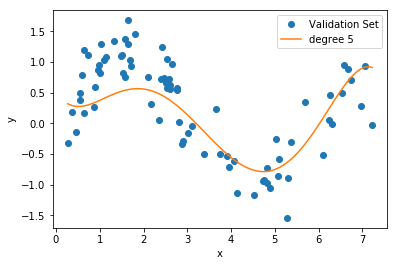

In [65]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
    T = data['T']
    V = data['V']
    k = 5
    p = train(T, k)
    print("coefficients of polynomial (decreasing order): ", end='')
    for i in range(k+1):
        print("%0.3f" %p.item(i), end= '   ')
    show(V['x'], V['y'], 'Validation Set', [p])

### Problem 3.5

Why is the plot for the training risk in problem 3.3 monotonic non-increasing? (If your plot doesn't look that way, you may want to review your solution to 3.3.) Explain briefly and clearly.

> Training risk in problem 3.3 is monotonic non-increasing due to the nature of polynomial fitting. As the degree of the polynomial increases, the fit of the training data improves. This is because the higher degree polynomials are more flexible and with greater oscillations reduce loss. The flexibility arises from the way that polynomials of degree k are fitted: lower degree polynomials (less than k) are a subset of the space that contains polynomials up to degree k. Therefore, for larger k values, which will include lower order polynomials, training risk (measure of fitting) will not increase as the degree increases.

### Problem 3.6

There are two technical terms that denote the fact that the validation risk is (i) higher for $k < k^{\star}$ and (ii) higher for $k > k^{\star}$, when compared to the validation risk at $k^{\star}$. What are the two terms? Specify which term is for which case ((i) or (ii)).

> (i) underfit

> (ii) overfit